### **DEMO 1**

In [ ]:
import random
import numpy as np
from   matplotlib import pyplot as plt

#### NÚMEROS ALEATORIOS

In [ ]:
# variable discreta - simulación de un dado

dado = [1, 2, 3, 4, 5, 6]                       # posibilidades de un dado

d = random.choice(dado)                         # obtengo un número aleatorio

print("dado = ", d)                                    

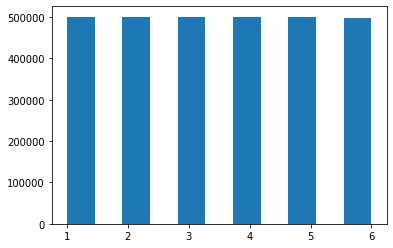

In [13]:
# múltiples experimentos y gráficos

n = 3000000                                         # cantidad de valores

valores = np.array([random.choice(dado) for i in range(n)])

plt.hist(valores, bins = 11)          # grafica el histograma

plt.show()

In [16]:
# Variable continua - Tiempo de vuelo

t = np.random.normal(loc=128, scale=6)          # (loc) media, (scale) desvio

print(f"tiempo de vuelo = {t:.2f} min")           


tiempo de vuelo = 122.34 min


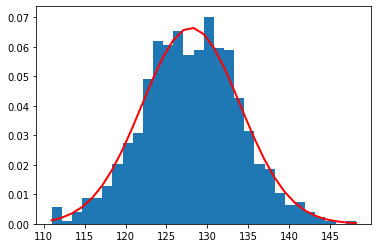

In [20]:
# múltiples experimentos y gráficos

n = 1000
m = 128                  
d = 6
bins = 30

s = np.random.normal(loc=m, scale=d, size=n)                # media, desvio y tamaño de la muestra

count, bins, ignored = plt.hist(s, bins=bins, density=True)
plt.plot(bins, 1/(d * np.sqrt(2 * np.pi)) * np.exp( - (bins - m)**2 / (2 * d**2) ), linewidth=2, color='r')
plt.show()

CORRELACIÓN

In [21]:
n = 30

In [22]:
x = np.random.normal(loc=20, scale=5, size=n)

y = np.random.uniform(10, 20, size=n)

np.corrcoef(x,y)

array([[1.        , 0.22308736],
       [0.22308736, 1.        ]])

In [23]:
x = np.random.normal(loc=20, scale=5, size=n)
y = x + np.random.uniform(10, 20, size=n)

np.corrcoef(x,y)

array([[1.        , 0.85702808],
       [0.85702808, 1.        ]])

TEOREMA CENTRAL DEL LÍMITE

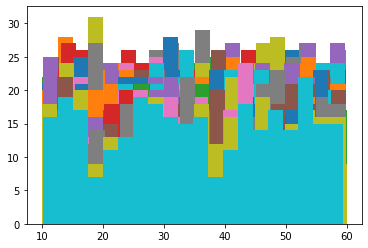

media poblacional =  35.0
varianza poblacional =  50.166666666666664
desvio poblacional =  7.082843120291926



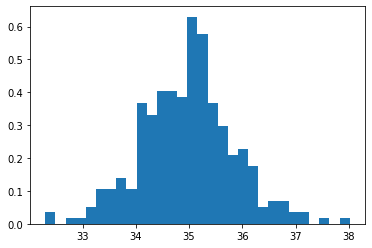

media conjuntos =  34.974837713894495  ≈ media poblacional
desvio conjuntos =  0.8720039949503989



In [ ]:
# genera la población (distribución uniforme entre 10 y 60)

k = 300    # cantidad de grupos
n = 300    # tamaño de cada grupo

g = [[]]    # lista de los 300 grupos con los 300 valores cada uno
m = []      # lista de las medias de cada grupo

a = 10         # limite inferior (uniforme)
b = 60         # limite superior (uniforme)

for i in range(k):
    g.append(np.random.uniform(a, b, size=n))           # genera el grupo
    m.append(np.mean(g[i+1]))                           # obtiene la media de cada grupo
    plt.hist(g[i+1],bins=20)

plt.show()                                              # muestra los histogramas de los disntintos grupos

print("media poblacional = ",(a+b)/2)
print("varianza poblacional = ",((b*a)^2)/12)
print("desvio poblacional = ",np.sqrt(((b*a)^2)/12))
print()

# dibuja el histograma de las medias
plt.hist(m, bins=30, density=True)
plt.show()

# calculo media y desvio de las medias de los grupos

print("media conjuntos = ", np.mean(m), " ≈ media poblacional")
print("desvio conjuntos = ", np.std(m))
print()




AJUSTE DE DATOS

In [25]:
import fitter as ft

BASICO

In [26]:
f = ft.Fitter(m)
f.fit()

In [27]:
f.summary()

,sumsquare_error,aic,bic,kl_div
gennorm,0.951339,508.235667,-1708.988763,inf
logistic,0.960878,505.670346,-1711.699652,inf
burr12,0.961610,509.378504,-1700.063408,inf
dweibull,0.961666,509.406515,-1705.749886,inf
genhyperbolic,0.963130,513.456907,-1693.885771,inf


Error in callback <function flush_figures at 0x7ff760dab940> (for post_execute):


/Users/lucianosmith/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

**sumsquare_error**: es la suma de las diferencias al cuadrado entre el valor observado y el valor de la curva. 

**aic**: el criterio de información de Akaike (AIC) es una medida de la calidad relativa de un modelo estadístico, para un conjunto dado de datos. Se prefieren los modelos con un AIC más alto.

**bic**: el criterio de información bayesiano (BIC) es un criterio para la selección de modelos entre un conjunto finito de modelos. Se prefieren los modelos con un BIC más bajo.

**kl_div**: Kullback–Leibler (KL) Divergence es una medida de cuan probable una distribución es diferente de otra. 

AVANZADO

,sumsquare_error,aic,bic,kl_div
norm,0.639868,418.990963,-1833.675395,inf
lognorm,0.641855,418.730077,-1827.041232,inf
erlang,0.642351,418.640185,-1826.809694,inf
gamma,0.642450,418.584424,-1826.763226,inf
exponpow,0.973671,420.998157,-1702.027849,inf


/Users/lucianosmith/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


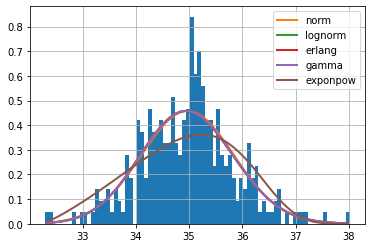

In [28]:
f = ft.Fitter(m, bins=80, timeout=100, distributions=['norm', 'erlang', 'lognorm','exponpow', 'gamma', 'uniform'])
f.fit()
f.summary()


In [29]:
f.fitted_param['norm']

(34.974837713894495, 0.8720039949503989)